<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Classification of Weather Data using Decision Trees
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Daily Weather Data Analysis</p>

In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Importing the Necessary Libraries<br></p>

In [82]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Creating a Pandas DataFrame from a CSV file<br></p>


In [84]:
data = pd.read_csv('daily_weather.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Daily Weather Data Description</p>


The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

In [86]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [87]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


In [89]:
data.shape

(1095, 11)


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Checking Null Values </p>

1. How many columns have null values?
2. How many rows have null values?
3. remove the rows with null values.
4. Verify that null values are dropped -- How many rows dropped due to cleaning?

In [91]:
data.isnull().any()
data.isnull().any(axis=1).sum()

31

In [92]:
True*1

1

In [93]:
# data.drop(columns='number',axis=1) #drop by columns // drop a column, you set axis=1

In [94]:
missing_column=data.isnull().sum()
print(missing_column)

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64


In [95]:
missing_row=data.isnull().sum(axis=1)
print(missing_row)

0       0
1       0
2       0
3       0
4       0
       ..
1090    0
1091    0
1092    0
1093    0
1094    0
Length: 1095, dtype: int64


In [96]:
data_cleaned=data.dropna() #drop by rows

In [97]:
data_cleaned

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


In [98]:
print(data_cleaned.shape) #1095-31=1064

(1064, 11)


In [99]:
rows_dropped = len(data) - len(data_cleaned)
print('rows dropped length：',rows_dropped)

rows dropped length： 31


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Further Data Cleaning <br></p>

We will not need to number for each row so we can clean it.

In [101]:
del data_cleaned['number']
print(data_cleaned.shape)

(1064, 10)


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Convert to a Classification Task <br></p>
Let's predict/classify the relative humidity values at 3pm by using some of the 9am sensor signals. <br>

Since a classification task predicts a categorical output, and relative_humidity_3pm currently is a numerical type, let's **binarize the relative_humidity_3pm to 0 or 1** -- if the humidity > 24.99, then we set it to 1; otherwise 0. <br>

**Inputs (features)**: all 9am sensor data features except for `relative_humidity_9am` . <br>
**Output**: humidity level @3pm (1 or 0)


In [103]:
data_cleaned['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [104]:
print (False * 1)

0


In [105]:
print (True * 1)

1


In [106]:
data['relative_humidity_3pm'] > 24.99

0        True
1       False
2       False
3       False
4        True
        ...  
1090     True
1091     True
1092     True
1093     True
1094    False
Name: relative_humidity_3pm, Length: 1095, dtype: bool

In [107]:
data_cleaned = data_cleaned.copy()
# The "*1" below converts a boolean type to a int type
print(data_cleaned['relative_humidity_3pm'] > 24.99)
print("--------")
print((data_cleaned['relative_humidity_3pm'] > 24.99)*1)
print("--------")
data_cleaned['high_humidity_label'] = (data_cleaned['relative_humidity_3pm'] > 24.99)*1
data_cleaned.head()

0        True
1       False
2       False
3       False
4        True
        ...  
1090     True
1091     True
1092     True
1093     True
1094    False
Name: relative_humidity_3pm, Length: 1064, dtype: bool
--------
0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: relative_humidity_3pm, Length: 1064, dtype: int64
--------


,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Output: Target is stored in a separate dataframe 'y'.
<br><br></p>


In [109]:
y=data_cleaned[['high_humidity_label']].copy()
print(type(y))
y.head()

<class 'pandas.core.frame.DataFrame'>


,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [110]:
data_cleaned[['relative_humidity_3pm']].head()

,relative_humidity_3pm
0,36.160000
1,19.426597
2,14.460000
3,12.742547
4,76.740000


In [111]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Inputs: Features are stored in a separate dataframe X <br></p>

### Choose a subset of all 9am features, excluding 'relative_humidity_9am', to use as the features for `X`.


In [113]:
data_cleaned.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity_label'],
      dtype='object')

In [114]:
morning_features=[ 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
        'relative_humidity_9am']
morning_features

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'relative_humidity_9am']

In [115]:
X=data_cleaned[morning_features]
X.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,92.410000


In [116]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'relative_humidity_9am'],
      dtype='object')

In [117]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [118]:
X.shape

(1064, 7)

In [119]:
y.shape

(1064, 1)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> <br>
Perform Test and Train split
<br></p>



## REMINDER: Training Phase

In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.

<img src="Images/TrainingVSTesting.png" align="middle" style="width:350px;height:200px;"/>
<br>

In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


### Split Dataset into training set and testing set <br>
For example 67% for training and 33% for testing. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" width = 200> document for sklearn.model_selection.train_test_split() </a>

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 7) (352, 7) (712, 1) (352, 1)


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Fit on the Train Set (Model building, e.g., creating the decision tree)</p>

 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier


In [125]:
humidity_classifier_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

In [126]:
humidity_classifier_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Predict on Test Set 
</p>


In [128]:
y_pred = humidity_classifier_DT.predict(X_test)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Measure Accuracy of the Classifier
<br></p>

Compare predicted y values with actual y values from the test set and calculate accuracy.

In [130]:
accuracy_score(y_true = y_test, y_pred = humidity_classifier_DT.predict(X_test))

0.8920454545454546

                  Feature  Importance
6   relative_humidity_9am    0.695187
0        air_pressure_9am    0.140889
1            air_temp_9am    0.080564
4  max_wind_direction_9am    0.041539
5      max_wind_speed_9am    0.018997
2  avg_wind_direction_9am    0.017587
3      avg_wind_speed_9am    0.005236


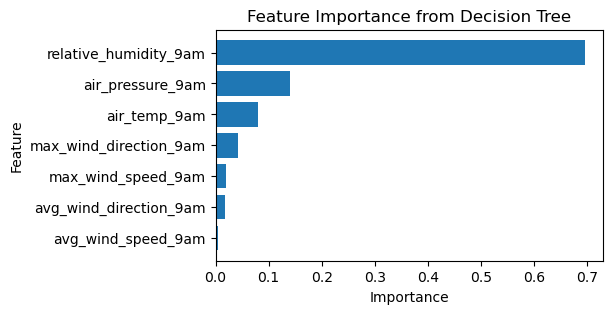

<Figure size 640x480 with 0 Axes>

In [131]:
import matplotlib.pyplot as plt
feature_names = X_train.columns  # If X_train is a DataFrame

# Get feature importances
importances = humidity_classifier_DT.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot the importances
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()

# Save the plot to a file
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

### The Training and Testing Process
<img src="Images/TrainingTesting_Process.png" align="middle" style="width:650px"/>
<br>

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
Practice
</p>
1. Change some hyperparameters of DecisionTreeClassifier, e.g., criterion, splitter, max_depth, etc, re-train and te-test the model and what is the result? <br>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
2. Change *morning_features*, re-train and te-test the model and what is the result?
<p>


## 1. Change some hyperparameters of DecisionTreeClassifier


## 2. Adding "relative_humidity_9am"  from the feature set.